## 3.6 d)

### Code for 3.6 b) part
- We will perform '$x$' experiments and apply the likelihood weighing formula to compute the probability for each bit.
- In each experiment we randomly choose between 0,1 values for each bit as given $P(B_i) = 0.5$ for all $i=1$ to $10$.
- We see the experiments in which B_i is actually set to 1 and multiply them with conditional probablity of  Z=128 given bits, formula used is as shown:
$\newline$
<!-- $$P(B_i=1 | Z=128) = \sum_{j=1}^{x} \frac{I(B_i_j, 1)P(Z=128 | B_1,B_2...B_n)}{sddas}$$ -->
$$P(B_i=1 | Z=128) =  \frac{\sum_{j=1}^{x} I(B_{ij}, 1)*P(Z=128 | B_{1j},B_{2j}..B_{nj})}{\sum_{j=1}^{x} P(Z=128 | B_{1j},B_{2j}..B_{nj})}$$
$\newline$
where $x$ is the number of experiments performed, $B_{ij}$ denotes the value of $B_i$ bit generated in the $j^{th}$ experiment, $I$ is the indicator function and we can estimate $P(Z/B_1,B_2,..B_n)$ from the formula mentioned in the question.

In [84]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [60]:
def compute_number_from_bits(bits):
    ans = 0
    for i in range(len(bits)):
        ans = ans*2 + bits[i]
    return ans

def get_probability_z_given_bits(z, bits, alpha):
    return ((1.0 - alpha)/(1.0 + alpha))*(alpha ** abs(z - compute_number_from_bits(bits)))

def get_random_bit():
    return random.randint(0, 1)

def indicator_func(x, y):
    return (1.0 if x == y else 0.0)

def estimate_probability(bit_idx, n, z, alpha, x):
    prob_arr = []
    num = 0.0
    den = 0.0
    for j in range(int(x)):
        bits = [get_random_bit() for _ in range(int(n))]
        num = num + indicator_func(bits[n-bit_idx], 1) * get_probability_z_given_bits(z, bits, alpha)
        den = den + get_probability_z_given_bits(z, bits, alpha)
        if den == 0:
            continue
        prob_arr.append(num/den)
    
    return prob_arr

In [103]:
z = 128
x = 1e6
alpha = 0.1
n = 10
print('Z = {}, number of experiments(x) = {}, alpha = {}, number of bits (n) = {}'.format(z, int(x), alpha, n))
for bit in [2, 5, 8, 10]:
    prob_arr = estimate_probability(bit, n, z, alpha, x)
    print('Value of P(B_{}=1 | Z={}) using likelihood weighting is {}'.format(bit, z, prob_arr[-1]))

Z = 128, number of experiments(x) = 1000000, alpha = 0.1, number of bits (n) = 10
Value of P(B_2=1 | Z=128) using likelihood weighting is 0.09403678288929593
Value of P(B_5=1 | Z=128) using likelihood weighting is 0.09023897826641636
Value of P(B_8=1 | Z=128) using likelihood weighting is 0.9071702174404811
Value of P(B_10=1 | Z=128) using likelihood weighting is 0.0


### Code for 3.6 c) part
- We take the values of probability array and plot them in a log space with base 10.
- From the plot of each bit we can clearly observe that the value of probability converges to a good degree of precision.
- I am also printing the last 10 values of each probability array from which we can infer that the probability has converged to a good degree of precision.

In [88]:
def plot_func(prob_arr, bit, num_exp):
    x_logspace = np.logspace(2, 6, 100, endpoint=False)
    x_indices = [int(idx) for idx in x_logspace]
    y_indices = [prob_arr[idx-1] for idx in x_indices]
    plt.figure(figsize=(12, 7))
    plt.plot(x_indices, y_indices)
    plt.title('Probability P(B_{}=1 | Z=128) vs Number of experiments'.format(bit, num_exp),fontsize=15)
    plt.xlabel('Number of experiments (x)')
    plt.ylabel('Probability P(B_{} = 1 | Z = 128)'.format(bit))
    plt.show()

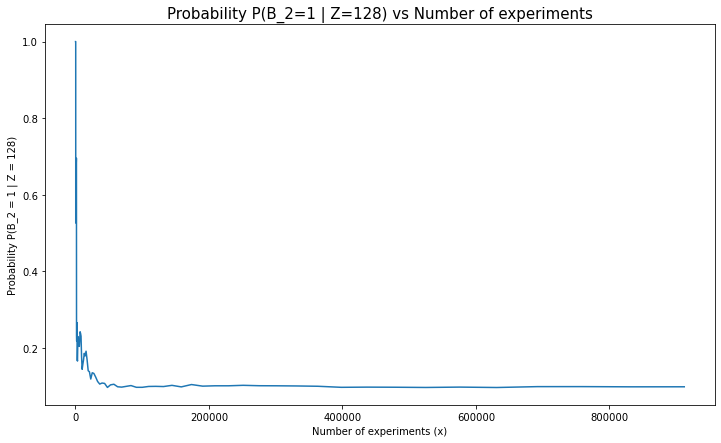

Out of 1000000.0 experiments, the last 15 values of probability estimated for bit = 2 is [0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133, 0.09816958378271133]


In [99]:
bit = 2
prob_arr = estimate_probability(bit, n, z, alpha, x)
plot_func(prob_arr, bit, x)
print('Out of {} experiments, the last 15 values of probability estimated for bit = {} is {}'.format(x, bit, prob_arr[-15:]))

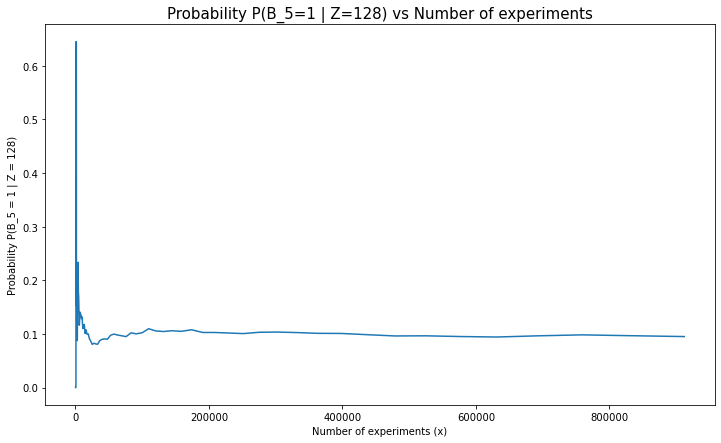

Out of 1000000.0 experiments, the last 15 values of probability estimated for bit = 5 is [0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253, 0.09590608585575253]


In [100]:
bit = 5
prob_arr = estimate_probability(bit, n, z, alpha, x)
plot_func(prob_arr, bit, x)
print('Out of {} experiments, the last 15 values of probability estimated for bit = {} is {}'.format(x, bit, prob_arr[-15:]))

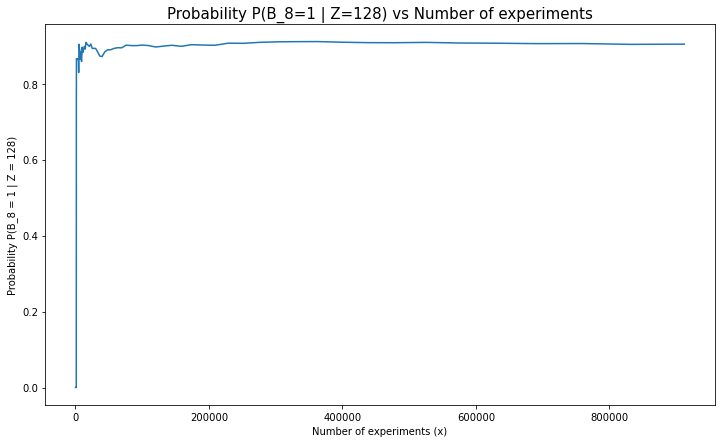

Out of 1000000.0 experiments, the last 15 values of probability estimated for bit = 8 is [0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688, 0.9033531880190688]


In [101]:
bit = 8
prob_arr = estimate_probability(bit, n, z, alpha, x)
plot_func(prob_arr, bit, x)
print('Out of {} experiments, the last 15 values of probability estimated for bit = {} is {}'.format(x, bit, prob_arr[-15:]))

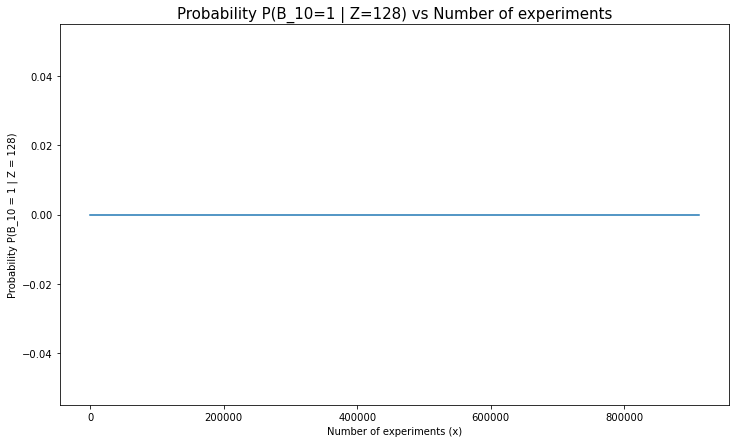

Out of 1000000.0 experiments, the last 15 values of probability estimated for bit = 10 is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [102]:
bit = 10
prob_arr = estimate_probability(bit, n, z, alpha, x)
plot_func(prob_arr, bit, x)
print('Out of {} experiments, the last 15 values of probability estimated for bit = {} is {}'.format(x, bit, prob_arr[-15:]))